In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("dataset/glass.csv")

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
X = data.drop(columns=["Type"], axis=1)

In [12]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
y = data["Type"]

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [14]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### when ever we have a distance in the algorithm will use the scaling, to scale data into same scale this scaling is required.

In [15]:
# why scaling ?
# : because ditance is included, 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [18]:
X_test

array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

In [39]:
def knn_training(X_train, y_train, X_test, K):
    '''
    X_train : training data
    y_train : label for the training
    X_test  : it is for the validation
    K       : it is number of the nearest neighbours
    '''
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return prediction

#### 1. How to decide the number of k

heuristic method = sqrt of total records => this is a nearest neighbour

based on research => you can take different values of k = 1 to k = N (total number of instances)

In [40]:
import math

In [53]:
n = data.shape[0]
K = int(math.sqrt(n))

In [54]:
K

14

In [55]:
y_pred = knn_training(X_train, y_train, X_test, K)

In [56]:
accuracy_score(y_test, y_pred)

0.5581395348837209

In [48]:
K_value = range(1, 20)
accuracy = []

for K in K_value:
    y_pred = knn_training(X_train, y_train, X_test, K)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print(f"for this K value {K} the acc is {acc}")

for this K value 1 the acc is 0.7209302325581395
for this K value 2 the acc is 0.6744186046511628
for this K value 3 the acc is 0.6744186046511628
for this K value 4 the acc is 0.6744186046511628
for this K value 5 the acc is 0.6511627906976745
for this K value 6 the acc is 0.6744186046511628
for this K value 7 the acc is 0.6976744186046512
for this K value 8 the acc is 0.6511627906976745
for this K value 9 the acc is 0.627906976744186
for this K value 10 the acc is 0.627906976744186
for this K value 11 the acc is 0.627906976744186
for this K value 12 the acc is 0.5581395348837209
for this K value 13 the acc is 0.6046511627906976
for this K value 14 the acc is 0.5581395348837209
for this K value 15 the acc is 0.5348837209302325
for this K value 16 the acc is 0.5581395348837209
for this K value 17 the acc is 0.5581395348837209
for this K value 18 the acc is 0.5581395348837209
for this K value 19 the acc is 0.6046511627906976


In [49]:
max(accuracy)

0.7209302325581395

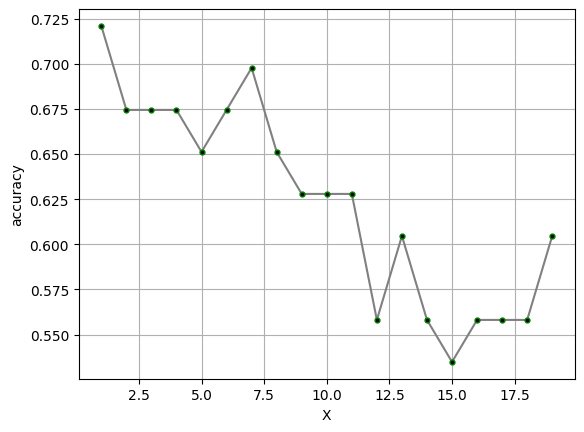

In [50]:
plt.plot(K_value, accuracy, c="gray", marker=".", ms=7, mfc="black", mec="green")
plt.xlabel("X")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

#### Pros:

1. It is simple and easy to implement
2. This is effective for the low-dimenssion dataset(less number of features)
3. In this knn we don't have the training phrase we only have the testing phase; when ever we add the new data point so we can add it without the training
(that's hwy it is called lazy-learner)

#### Cons:

1. Not suitable for the large dataset
2. It is not suitable for the higher dimenssion [Reason: since there is no training process, everything we are doing on distance ]
3. Not suitable for the imbalanced data.
4. It is not suitable for the outlier
5. It is not suitable for the large scaled or data without scaling.
